In [6]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import functions
from tqdm import tqdm
from python_speech_features import mfcc

In [2]:
label_names = ['no', 'yes', 'on', 'off', 'down', 'up', 'left', 'right', 'go', 'wow']

data = np.load('voice_samples.npz')

X_train_time, y_train_words, X_test_time, y_test_words = [data[f] for f in data.files]

y_train_num = functions.y_to_num(y_train_words, label_names)
y_test_num = functions.y_to_num(y_test_words, label_names)

In [3]:
from scipy.io import wavfile
wavfile.write('output_signal.wav', 16000, X_test_time[0, :])

In [4]:
print(X_train_time.shape)
print(X_test_time.shape)

(15000, 16000)
(2000, 16000)


In [5]:
ex = X_train_time[5002, :]
print(ex.shape)

(16000,)


In [10]:
ex_mfcc = mfcc(ex, 16000, numcep = 13, nfilt=26, nfft = 400).T
print(ex_mfcc.shape)

(13, 99)


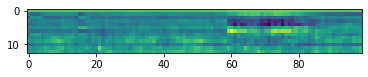

In [11]:
plt.imshow(ex_mfcc)
plt.show()

In [17]:
X_train_mfcc = []
X_test_mfcc = []

In [24]:
for it in range(X_train_time.shape[0]):
    tmp = X_train_time[it, :]
    tmp_mfcc = mfcc(tmp, 16000, numcep = 13, nfilt=26, nfft = 400).T.tolist()
    X_train_mfcc.append(tmp_mfcc)
    
for it in range(X_test_time.shape[0]):
    tmp = X_test_time[it, :]
    tmp_mfcc = mfcc(tmp, 16000, numcep = 13, nfilt=26, nfft = 400).T.tolist()
    X_test_mfcc.append(tmp_mfcc)

In [48]:
X_train_mfcc = np.array(X_train_mfcc).astype(np.float32)
X_test_mfcc = np.array(X_test_mfcc).astype(np.float32)
y_train_num , y_test_num = y_train_num.astype(np.uint8), y_test_num.astype(np.uint8)

In [42]:
print(X_test_mfcc.shape)

(2000, 13, 99)


In [43]:
print(X_train_mfcc.shape)
print(X_test_mfcc.shape)

(17530, 13, 99)
(2000, 13, 99)


yes


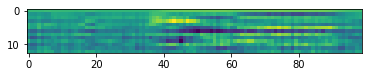

-6.686515
-63.84375
float32


In [44]:
idx = 210
print(y_test_words[idx])
plt.imshow(X_test_mfcc[idx,:,:])
plt.show()
print(np.mean(X_test_mfcc[idx,:,:]))
print(np.min(X_test_mfcc[idx,:,:]))
print(X_test_mfcc.dtype)

In [45]:
sigma = np.std(X_train_mfcc)
print(sigma)

14.910543


In [46]:
X_train_mfcc , X_test_mfcc = X_train_mfcc/sigma , X_test_mfcc/sigma

yes


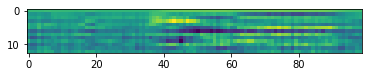

-0.44844207
2.8482363
float32


In [47]:
idx = 210
print(y_test_words[idx])
plt.imshow(X_test_mfcc[idx,:,:])
plt.show()
print(np.mean(X_test_mfcc[idx,:,:]))
print(np.max(X_test_mfcc[idx,:,:]))
print(X_test_mfcc.dtype)

In [50]:
idx = 210
print(y_test_words[idx])
print(np.mean(X_test_mfcc[idx,:,:]))
print(np.max(X_test_mfcc[idx,:,:]))
print(X_test_mfcc.dtype)

yes
-0.44844207
2.8482363
float32


In [51]:
"""execute this code!!!"""
np.savez_compressed('voice_mfcc.npz',
                    X_train = X_train_mfcc,
                    y_train = y_train_num,
                    X_test = X_test_mfcc,
                    y_test = y_test_num)